In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Insert local path to MAVE-NN at beginning of Python's path
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn')

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn']


In [2]:
# Load GFP data
data_df = pd.read_csv('GFPdata_2019_11_04.tsv', delim_whitespace=True)

# get sequences and their measurements

X = data_df['AAsequence'].values
y = data_df['medianBrightness'].values

# split data into training and test sets. 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
data_df.head()

,AAsequence,HammingDistance,aaMutations,medianBrightness,std
0,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,3.7192121319,0.106992,NaN
1,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1,SA108D,1.301030,NaN
2,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,5,SA108D:SN144D:SI186V:SM231T:SL234P,1.301031,NaN
3,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,4,SA108D:SY141N:SH146L:SE220G,1.301189,NaN
4,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1,SA108G,3.708478,0.020613


In [4]:
# split data into training/validation/test sets. ghh
N = len(data_df)
training_frac=.8
np.random.seed(0)
r = np.random.rand(N)
test_frac = .2
val_frac = .2
ix_train = (test_frac + val_frac <= r)
ix_val = (test_frac <= r) & (r < test_frac + val_frac)
ix_test = (r < test_frac)

data_df['set'] = ''
data_df.loc[ix_train, 'set'] = 'training'
data_df.loc[ix_val, 'set'] = 'validation'
data_df.loc[ix_test, 'set'] = 'test'
assert all([len(x)>0 for x in data_df['set']])

In [5]:
# rename columns
data_df=data_df.rename(columns = {'AAsequence':'x','medianBrightness':'y'})
# Order columns
data_df = data_df[['set', 'HammingDistance', 'aaMutations', 'y', 'std','x']]
# preview dataset
data_df.head()

,set,HammingDistance,aaMutations,y,std,x
0,training,0,3.7192121319,0.106992,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
1,training,1,SA108D,1.301030,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
2,training,5,SA108D:SN144D:SI186V:SM231T:SL234P,1.301031,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
3,training,4,SA108D:SY141N:SH146L:SE220G,1.301189,NaN,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
4,training,1,SA108G,3.708478,0.020613,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...


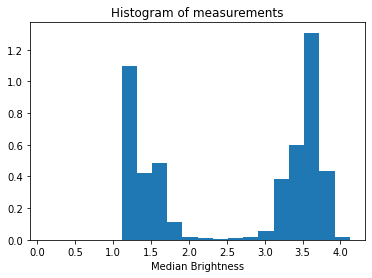

In [6]:
plt.hist(data_df['y'],bins=20,density=True)
plt.title('Histogram of measurements')
plt.xlabel('Median Brightness')
plt.show()

In [7]:
# Save data as gzip and show size of compressed dataset file
file_name = 'gfp_data.csv.gz'
data_df.to_csv(file_name, compression='gzip', index=False)
print('data_df (zipped):')
!du -mh $file_name
!mv $file_name ../.

data_df (zipped):
1.5M	gfp_data.csv.gz
